In [14]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps #bibliothèque proposant densités, fonctions  de répartition, quantiles, etc... de lois usuelles.


Dans ce document, on commence par donner quelques exemples d'applications du cours. On se servira des trois librairies ci-dessus. On peut déjà commencer par initialiser le générateur de nombres aléatoires :

In [9]:
np.random.seed(12345)
print(np.random.rand(100))

[0.92961609 0.31637555 0.18391881 0.20456028 0.56772503 0.5955447
 0.96451452 0.6531771  0.74890664 0.65356987 0.74771481 0.96130674
 0.0083883  0.10644438 0.29870371 0.65641118 0.80981255 0.87217591
 0.9646476  0.72368535 0.64247533 0.71745362 0.46759901 0.32558468
 0.43964461 0.72968908 0.99401459 0.67687371 0.79082252 0.17091426
 0.02684928 0.80037024 0.90372254 0.02467621 0.49174732 0.52625517
 0.59636601 0.05195755 0.89508953 0.72826618 0.81835001 0.50022275
 0.81018941 0.09596853 0.21895004 0.25871906 0.46810575 0.4593732
 0.70950978 0.17805301 0.53144988 0.16774223 0.76881392 0.92817055
 0.60949366 0.15018349 0.4896267  0.37734495 0.84860141 0.91109723
 0.38384872 0.3154959  0.56839415 0.18781804 0.12584154 0.68759581
 0.79960672 0.57353657 0.97322998 0.63405438 0.88842172 0.49541476
 0.35161653 0.71423037 0.50392912 0.22563761 0.24497444 0.7928007
 0.49517241 0.91509367 0.94537183 0.53323223 0.25249259 0.72086206
 0.36743876 0.49864844 0.22657505 0.35356565 0.65085179 0.3129329

# Préambule : Loi uniforme

Génerons un échantillon de 50 nombres uniformes sur $]0,1[$, calculons sa moyenne, sa variance et représentons son histogramme et la densité cible :

0.48641930292346813
0.0730516559698809


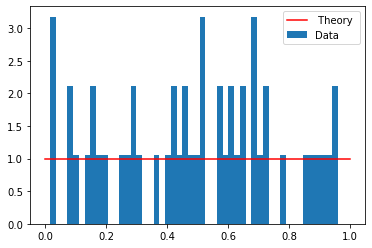

In [ ]:
u = np.random.rand(50)
print(np.mean(u))
print(np.var(u))
x = np. linspace (0,1,100)
f_x = sps.uniform.pdf(x) #Densite uniforme (pdf densité)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On augmente la taille de l'échantillon :

0.49942249130026134
0.08105352033385237


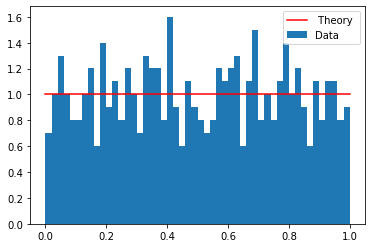

In [11]:
u = np.random.rand(500)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On voit que l'estimation des moments se fait plus précise à mesure que la taille de l'échantillon augmente. L'histogramme se rapproche également de la densité cible.

0.49265276573925415
0.08504812670886816


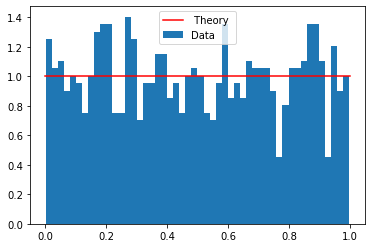

In [12]:
u = np.random.rand(1000)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Méthode d'inversion

## Loi exponentielle

On va transformer cet échantillon pour produire des réalisations de la loi exponentielle de paramètre $\lambda$ par la méthode d'inversion. Soit $X$ une variable aléatoire de loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est donnée par :
$$F_X(x) = 1 - \exp(-\lambda x),~~x\in \mathbb{R}_+$$
Pour calculer son inverse, on résoud $u =  1 - \exp(-\lambda x)$. On trouve ainsi
$$x = -\frac{1}{\lambda}\log(1-u)$$
que l'on peut simplifier en
$$x = -\frac{1}{\lambda}\log(u)$$
puisque si $U\sim \mathcal{U}_{]0,1[}$, alors $1-U \sim \mathcal{U}_{]0,1[}$.

Pour générer un échantillon de réalisations de la loi exponentielle de paramètre $\lambda$, on applique donc cette transformation à un échantillon de réalisations de la loi uniforme sur $]0,1[$.

In [13]:
param = 1
y = -1/param * np.log(np.random.rand(1000))

De même, on peut réprésenter son histogramme et y superposer la densité exponentielle

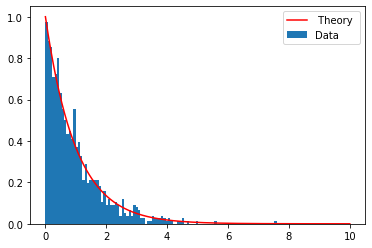

In [ ]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
plt.plot(x, f_x, "r", label = " Theory ")
plt.hist(y, bins = 100, density = True, label = "Data")
plt.legend(loc = "best")
plt.show()

En pratique, on utilisera plutôt les fonctions internes de numpy pour simuler des réalisations selon les lois usuelles. Voir :

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

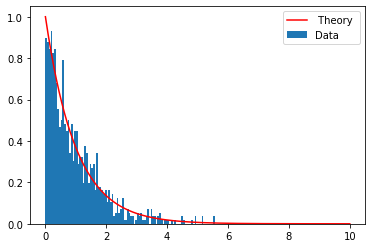

In [15]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
y = np.random.exponential(param,1000)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi uniforme dans un domaine 
### Domaine A

C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\1374335435.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,0] = u1
C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\1374335435.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,1] = u2


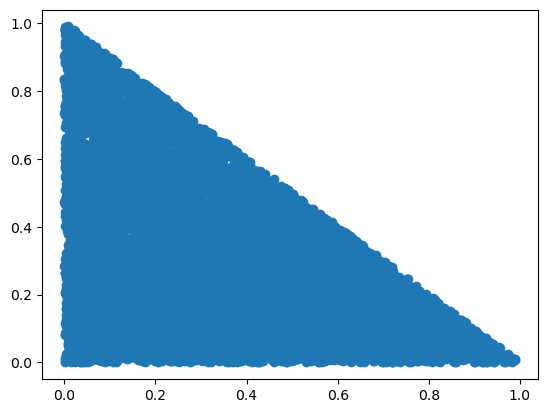

In [13]:
n = 10000

def rtri(n):
    x = np.empty([n,2])
    i = 0
    while i < n :
	    u1 = np.random.rand(1)
	    u2 = np.random.rand(1)
	    if (u2 < 1 - u1) :
		    x[i,0] = u1
		    x[i,1] = u2
		    i += 1
	
    return x	

tri = rtri(n)

plt.scatter(tri[:,0],tri[:,1],)
plt.show()

### Domaine B

C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\495953769.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,0] = u1
C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\495953769.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,1] = u2


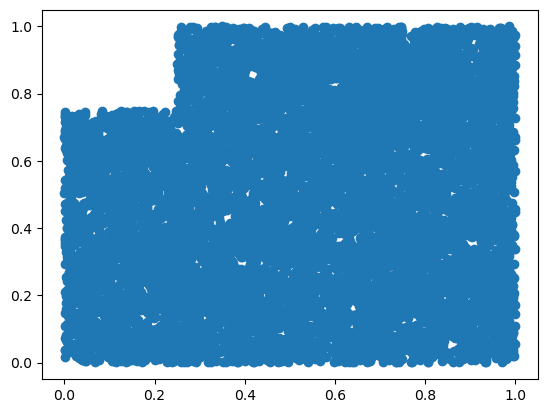

In [ ]:
n = 10000
def rB(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = np.random.rand(1)
	    u2 = 1.25*np.random.rand(1)
	    if not ((u1 < 0.25) and (u2 >0.75)) and not ((u1 > 0.25) and (u2 > 1)):
		    x[i,0] = u1
		    x[i,1] = u2
		    i += 1
	
    return x	

B = rB(n)

plt.scatter(B[:,0],B[:,1],)
plt.show()

### domaine C

C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\365727336.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,0] = u1
C:\Users\lisef\AppData\Local\Temp\ipykernel_28220\365727336.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i,1] = u2


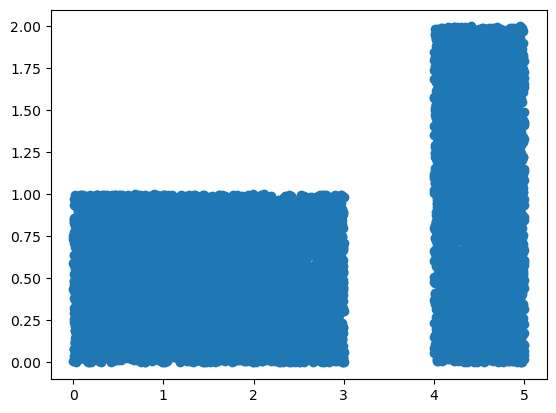

In [12]:
n = 10000
def rC(n):
    x = np.empty([n,2])
    i = 0
    while i < n :
	    u1 = 5*np.random.rand(1)
	    u2 = 2*np.random.rand(1)
	    if ((4 < u1 < 5) and (u2 < 2)) or((u1 < 3) and (u2 < 1)):
		    x[i,0] = u1
		    x[i,1] = u2
		    i = i+1
	
    return x	

C = rC(n)

plt.scatter(C[:,0],C[:,1],)
plt.show()

## Simulation selon la loi géométrique
### Question 2

In [ ]:
n = 1000
p = 0.6
q = 0.4
def rgeom(n,p):
    x = np.empty(n)
    for i in range(n) :
	    ok = False
	    k = 0
	    while not ok :
		    ok = ####
		    k = ####
	
	    x[i] = k

    return x

y = rgeom(n,p)

# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# histogram
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()


### Question 4

In [ ]:
n = 1000
lambd = ##### 
y = ##### 
# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# histogram
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

## Simulation de la loi gaussienne par la méthode du rejet
### Question 4
On rappelle qu'une variable de loi de Laplace peut s'obtenir à partir d'une variable uniforme sur ]0,1[ de la manière suivante : 
$X = \text{sgn}(U - 1/2)\ln(1-2|U-1/2|)$

In [12]:
# function simulating n symmetric
# exponential variables (Laplace distribution)
# with parameter 1

def rlaplace(n):
    u = np.random.rand(n)
    x = np.sign(u - 1/2)*np.log(1 - 2*np.abs(u -1/2))
    return x 

# function simulating n Gaussian random variables
# with mean 0 and variance 1 by rejection algorithm

def rgaussian(n):
    C = ((2*np.pi)**(-1/2))*np.exp(1/2)
    x = np.empty(n)

    for i in range(n) :
		y = rlaplace(1)
		u = np.random.rand(1)
		a = u*2*C*1/2*np.exp(-np.abs(y)) #2CUg(y)

		while a > sps.norm.pdf(y) :
			y = rlaplace(1)
            u = np.random.rand(1)
			a = u*2*C*1/2*np.exp(-np.abs(y))
	
	    x[i] = y

    return x

# Test of the function
n = 1000

y=rgaussian(n)
x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 24)

## Simulation de la loi de Wigner

La loi de Wigner (ou du demi-cercle) est la loi de support $[-2, 2]$ et de densité $f(x) = \frac{1}{2\pi}\sqrt{4 - x^2}$.
Pour simuler selon une densité $f$ à support compact $C$, le plus simple est d'utiliser une loi uniforme sur ce même compact comme densité instrumentale et de prendre $\sup_{x\in C}f(x)$ comme constante pour la majoration (en ignorant la constante de normalisation de l'uniforme 1/|C|).
Ici cette constante vaut $1/\pi$.

In [ ]:
n = 1000 #taille de l'échantillon

# densité de Wigner
def dwigner(x):
    return #####



Représentation graphique

In [ ]:
x = np. linspace (-2,2,1000)
f_x = dwigner(x)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi des grands nombres et théorème central limite
### Question 1

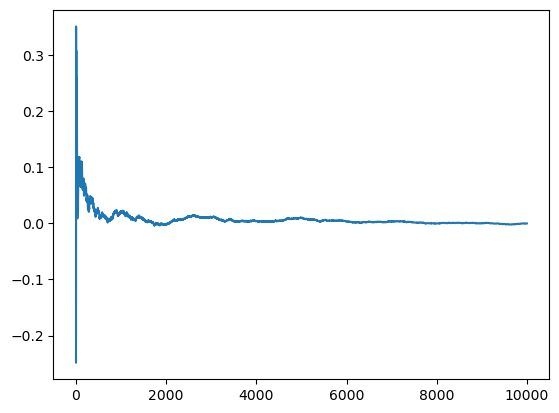

In [16]:
n = 10000
x = 1 + np.arange(n)
u = np.random.uniform(-1, 1, n)
Sn = np.cumsum(u)/(x)
plt.plot(x,Sn)
plt.show()

### Question 2

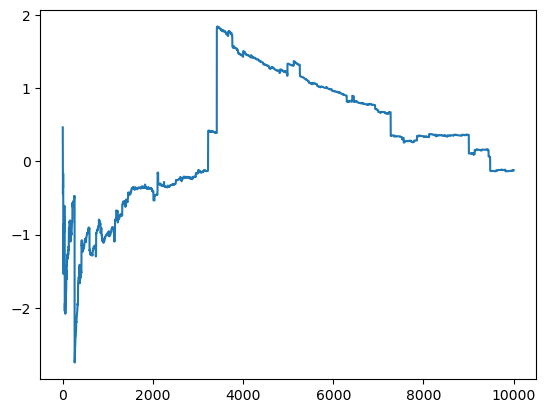

In [22]:
n = 10000
x = np.arange(n) + 1
y = np.random.standard_cauchy(n)
Sn = np.cumsum(y)/(x)
plt.plot(x,Sn)
plt.show()

### Question 3
On a $\mu = 0$ et $\sigma = \sqrt{\mathbb{E}(X^2)} =\frac{1}{\sqrt{3}}$

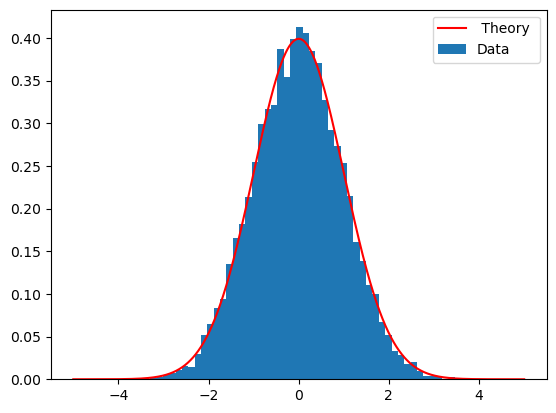

In [23]:
n = 10000
m = 10000
sigma = 1/np.sqrt(3)
y = np.zeros(m)
for i in range(m) : 
    y[i] = np.sqrt(n)/sigma*(sum(np.random.uniform(-1, 1, n))/n)

x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Simulation d'un mélange de gaussienne
### Question 1

On illustre ici l'application de la méthode d'inversion pour la simulation d'une loi discrète. Soit $X$ une v.a.r. de loi :
$$\mathbb{P}(X=x) = \left\{\begin{array}{ll} 1/2 & \text{ si }x = 1 \\ 1/4 & \text{ si }x = 2 \\ 1/4 & \text{ si }x = 3 \\ 0 & \text{ sinon} \end{array} \right.$$
On commence par calculer les valeurs non triviales prises par sa fonction de répartition, puis on transforme les variables uniformes comme suit :

In [ ]:
n=1000
p = ####
u = ######
print(p)
y = ##### 
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

### Question 2
On peut alors s'en servir pour simuler, par exemple, selon un mélange des gaussiennes : $\mathcal{N}(0,1)$, $\mathcal{N}(5,1/2)$ et $\mathcal{N}(8,4)$, chacune associée à une des modalités de $K$.

In [ ]:
z = ##### 
x = np. linspace (-5,15,n)
f_x = ##### #Densite du melange
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(z,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Echantillonnage d'importance

On cherche à évaluer l'espérance d'une variable aléatoire $X$ gaussienne centrée réduite (de densité $f_X$ et de f.d.r. $F_X$) sachant qu'elle dépasse la valeur 3. La densité conditionnelle s'écrit :

$$f_{X|X > 3}(x) = \frac{f_x(x)}{1-F_X(3)}1_{]3,+\infty[}(x)$$

et on veut estimer :

$$\mathbb{E}(X|X>3) = \int_{\mathbb{R}} x f_{X|X > 3}(x) dx$$

### Question 1

Si on implémente une méthode de rejet de manière naïve --- on tire des gaussiennes centrées réduites et on ne conserve que celles effectivement supérieures à 3 pour calculer l'espérance --- les estimations varient fortement d'un tirage à l'autre (on a même parfois des `nan`, lorsque l'échantillon ne contient aucune valeur supérieure à 3)  et le taux de rejet vaut :

In [ ]:
n = 1000
X = ##### 
Econd = #####
print(Econd)
#####

C'est donc peu efficace. 

### Question 3

On va donc tirer selon une loi instrumentale qui va mieux cibler la région d'intérêt, par exemple une gaussienne d'espérance 3 et de variance 1 (de densité notée $g$) et on utilisera alors l'estimateur :

$$\frac{\sum_{i=1}^{n}w_ih(X_i)}{\sum_{i=1}^n w_i}$$

avec les poids d'importance $w_i = \frac{f_{X|X > 3}(X_i)}{g(X_i)}$.

In [ ]:
def dnormcond(x,s): ### densité conditionnelle
    
    return 

n = 1000

y = #####

w = #####

print(####)

m = #####

m


On peut représenter l'histogramme de l'échantillon pondéré (le poids $w_i$ est affecté à chaque simulation dans le calcul de l'histogramme) et le comparer à $f_{X|X > 3}(x)$

In [ ]:
x = np.linspace(3,6,1000)
f_x = dnormcond(x,3)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, bins = 100, weights=w, label = "Data")
plt.legend(loc="best")
plt.show()

### Calcul numérique d'une probabilité
La variable $1_{\sin(X)>1/2}$ où $X \sim \mathcal{N}(0,1)$ est bien $\mathcal{L}^1$ car bornée par 1 et donc la loi forte des grands nombres s'applique.

In [ ]:
n=100000
np.mean(#################)

Visualisation de la convergence

In [ ]:
n=1000
x = np.arange(n)
Mn = np.cumsum(##########)/(1+x)
plt.plot(x,Mn)
plt.show()